<a href="https://colab.research.google.com/github/AArna1211/Traffic-prediction/blob/main/TP_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Flatten, Dense, Dropout, TimeDistributed, Conv1D


In [2]:
data = pd.read_csv("/content/Traffic.csv")

In [3]:
# Encode categorical "Traffic Situation"
label_encoder = LabelEncoder()
data["Traffic Situation Encoded"] = label_encoder.fit_transform(data["Traffic Situation"])

# Prepare features and labels
X = data[["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"]].values
y = data["Traffic Situation Encoded"].values

# Reshape input for time-series forecasting (sequence length = 3 for long-term prediction)
sequence_length = 3
X_sequences = []
y_sequences = []
for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])
X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

In [4]:
# Define GRU model for long-term forecasting
model = Sequential([
    TimeDistributed(Conv1D(filters=64, kernel_size=2, activation='relu'), input_shape=(sequence_length, X.shape[1], 1)),
    TimeDistributed(Flatten()),
    GRU(64, activation='relu', return_sequences=True),
    GRU(32, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=2, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.6202 - loss: 1.0380 - val_accuracy: 0.6975 - val_loss: 0.7989
Epoch 2/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6982 - loss: 0.8280 - val_accuracy: 0.7261 - val_loss: 0.7360
Epoch 3/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7172 - loss: 0.7987 - val_accuracy: 0.7277 - val_loss: 0.7214
Epoch 4/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7157 - loss: 0.7853 - val_accuracy: 0.7345 - val_loss: 0.7223
Epoch 5/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7094 - loss: 0.7787 - val_accuracy: 0.7345 - val_loss: 0.7161
Epoch 6/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7196 - loss: 0.7644 - val_accuracy: 0.7496 - val_loss: 0.6889
Epoch 7/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7346 - loss: 0.7633 - val_accuracy: 0.7529 - val_loss: 0.7112
Epoch 8/20
1189/1189 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7305 - loss: 0.

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Test Accuracy: 0.7529
Mean Absolute Error: 0.4471


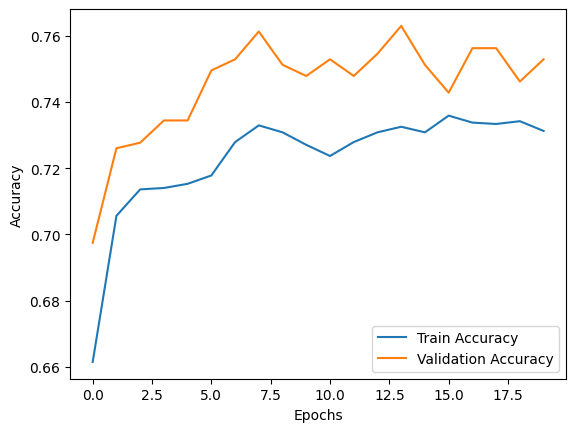

In [6]:
# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
